### Essential Libraries

We will begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [ ]:
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
sb.set()

### Import the Dataset

The dataset is in CSV format; hence we use the `read_csv` function from Pandas.  
Immediately after importing, we use the `head` function to see a preview.

In [ ]:
creditdata = pd.read_csv('CreditCardData.csv')
creditdata.head()

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,#3577 209,14-Oct-20,Wednesday,19,Visa,Tap,£5,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,#3039 221,14-Oct-20,Wednesday,17,MasterCard,PIN,£288,POS,Services,USA,USA,USA,F,49.6,Lloyds,0
2,#2694 780,14-Oct-20,Wednesday,14,Visa,Tap,£5,POS,Restaurant,India,India,India,F,42.2,Barclays,0
3,#2640 960,13-Oct-20,Tuesday,14,Visa,Tap,£28,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0
4,#2771 031,13-Oct-20,Tuesday,23,Visa,CVC,£91,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1


In [ ]:
print(creditdata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Transaction ID          100000 non-null  object 
 1   Date                    100000 non-null  object 
 2   Day of Week             100000 non-null  object 
 3   Time                    100000 non-null  int64  
 4   Type of Card            100000 non-null  object 
 5   Entry Mode              100000 non-null  object 
 6   Amount                  99994 non-null   object 
 7   Type of Transaction     100000 non-null  object 
 8   Merchant Group          99990 non-null   object 
 9   Country of Transaction  100000 non-null  object 
 10  Shipping Address        99995 non-null   object 
 11  Country of Residence    100000 non-null  object 
 12  Gender                  99996 non-null   object 
 13  Age                     100000 non-null  float64
 14  Bank                 

In [ ]:
creditdata.dropna(inplace = True) # removing null rows
print(creditdata.info())

<class 'pandas.core.frame.DataFrame'>
Index: 99977 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Transaction ID          99977 non-null  object 
 1   Date                    99977 non-null  object 
 2   Day of Week             99977 non-null  object 
 3   Time                    99977 non-null  int64  
 4   Type of Card            99977 non-null  object 
 5   Entry Mode              99977 non-null  object 
 6   Amount                  99977 non-null  object 
 7   Type of Transaction     99977 non-null  object 
 8   Merchant Group          99977 non-null  object 
 9   Country of Transaction  99977 non-null  object 
 10  Shipping Address        99977 non-null  object 
 11  Country of Residence    99977 non-null  object 
 12  Gender                  99977 non-null  object 
 13  Age                     99977 non-null  float64
 14  Bank                    99977 non-null  obj

# Cleaning Data

After reviewing each of the variables, we decided to remove those that we felt were not very relevant to our analysis objective.

In [ ]:
credit_data = pd.DataFrame(creditdata)
credit_data = credit_data.drop(columns=['Transaction ID', 'Date', 'Day of Week', 'Gender'])
credit_data


,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Age,Bank,Fraud
0,19,Visa,Tap,£5,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,25.2,RBS,0
1,17,MasterCard,PIN,£288,POS,Services,USA,USA,USA,49.6,Lloyds,0
2,14,Visa,Tap,£5,POS,Restaurant,India,India,India,42.2,Barclays,0
3,14,Visa,Tap,£28,POS,Entertainment,United Kingdom,India,United Kingdom,51.0,Barclays,0
4,23,Visa,CVC,£91,Online,Electronics,USA,USA,United Kingdom,38.0,Halifax,1
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,22,MasterCard,Tap,£15,POS,Electronics,United Kingdom,United Kingdom,United Kingdom,53.8,Halifax,0
99996,23,MasterCard,PIN,£7,ATM,Children,Russia,Russia,Russia,45.0,Barclays,0
99997,11,MasterCard,PIN,£21,ATM,Subscription,United Kingdom,United Kingdom,United Kingdom,46.5,HSBC,0
99998,22,Visa,Tap,£25,POS,Products,United Kingdom,United Kingdom,United Kingdom,48.2,Barclays,0


Afterwards, we modified 'Country of Residence', 'Country of Transaction' and 'Shipping address' to 'Residence = Transaction Country' and 'Transaction country = shipping address'. This would allow for easier analysis as we can directly tell if the transaction took place in the country of residence or if the shipping address was in the transaction country.

In [ ]:
# adding new columns, residence = transaction country and transaction country = shipping address
credit_data['Residence = Transaction Country'] = credit_data['Country of Residence'] == credit_data['Country of Transaction']
credit_data['Transaction country = shipping address'] = credit_data['Country of Transaction'] == credit_data['Shipping Address']

# cleaning Amount column
credit_data['Amount'] = credit_data['Amount'].astype(str).str.replace('£', '', regex=True)
credit_data['Amount'] = pd.to_numeric(credit_data['Amount'], errors='coerce')

credit_data

,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Age,Bank,Fraud,Residence = Transaction Country,Transaction country = shipping address
0,19,Visa,Tap,5,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,25.2,RBS,0,True,True
1,17,MasterCard,PIN,288,POS,Services,USA,USA,USA,49.6,Lloyds,0,True,True
2,14,Visa,Tap,5,POS,Restaurant,India,India,India,42.2,Barclays,0,True,True
3,14,Visa,Tap,28,POS,Entertainment,United Kingdom,India,United Kingdom,51.0,Barclays,0,True,False
4,23,Visa,CVC,91,Online,Electronics,USA,USA,United Kingdom,38.0,Halifax,1,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,22,MasterCard,Tap,15,POS,Electronics,United Kingdom,United Kingdom,United Kingdom,53.8,Halifax,0,True,True
99996,23,MasterCard,PIN,7,ATM,Children,Russia,Russia,Russia,45.0,Barclays,0,True,True
99997,11,MasterCard,PIN,21,ATM,Subscription,United Kingdom,United Kingdom,United Kingdom,46.5,HSBC,0,True,True
99998,22,Visa,Tap,25,POS,Products,United Kingdom,United Kingdom,United Kingdom,48.2,Barclays,0,True,True


# Exploratory Data Analysis

We plot histograms with normal distribution curves for the data with many categories and slightly more numeric in nature, and bar plots for categorical variables.

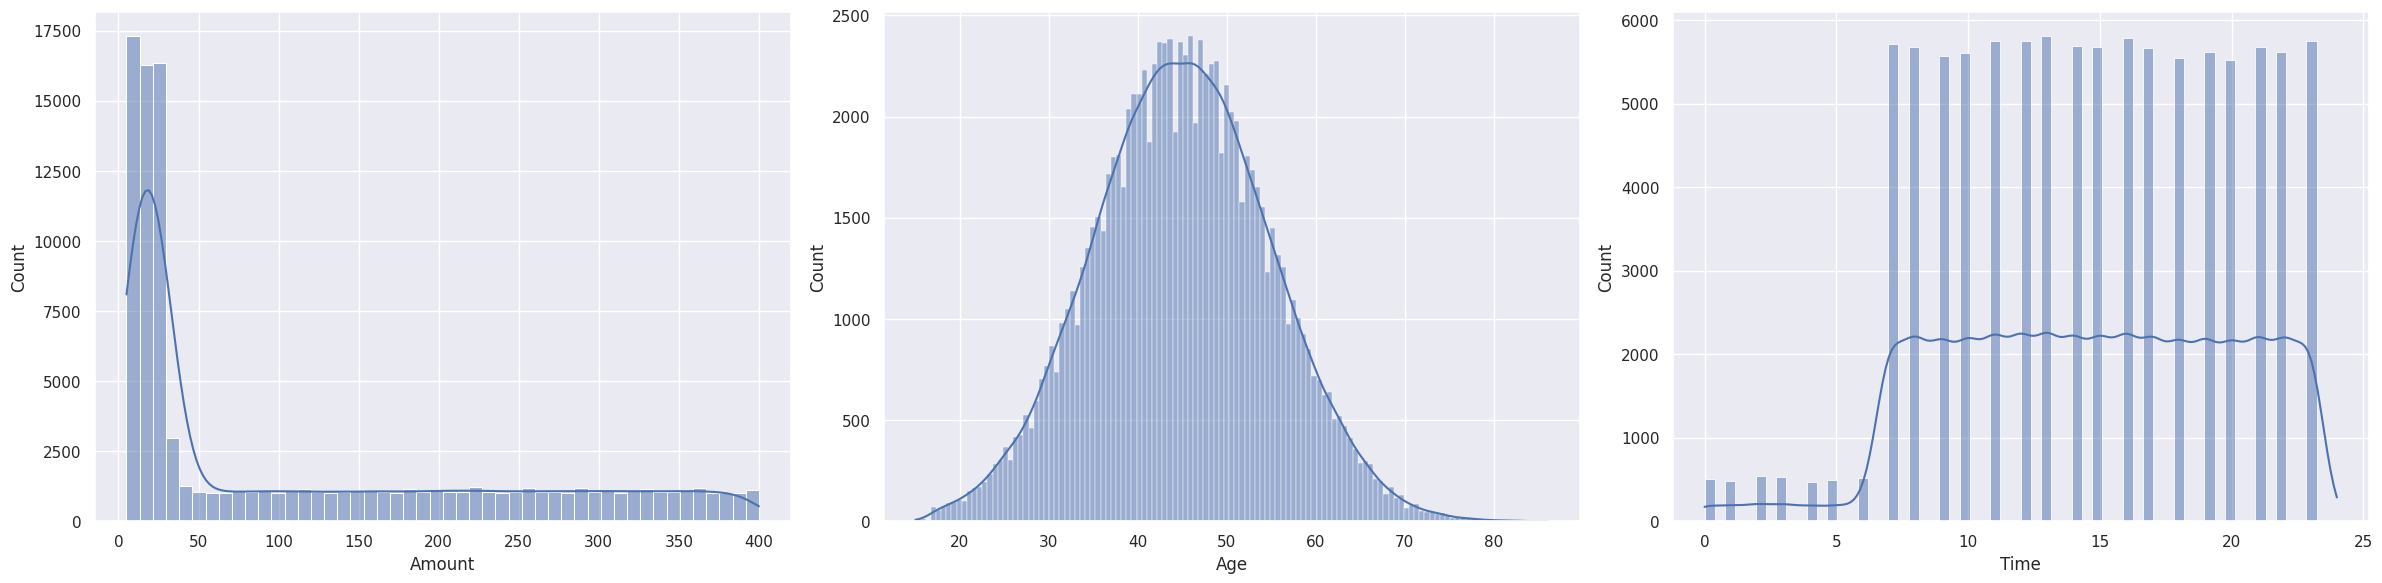

In [ ]:
datavisual = credit_data[['Amount', 'Age', 'Time']]
f, axes = plt.subplots(1, 3, figsize=(24, 6))

for i, column in enumerate(datavisual.select_dtypes(include=['number']).columns):
    sb.histplot(data=datavisual, x=column, ax=axes[i], kde = True)

plt.tight_layout()
plt.show()

<ipython-input-121-605207884344>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)  # rotate x-axis labels
<ipython-input-121-605207884344>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)  # rotate x-axis labels
<ipython-input-121-605207884344>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)  # rotate x-axis labels
<ipython-input-121-605207884344>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)  # rotat

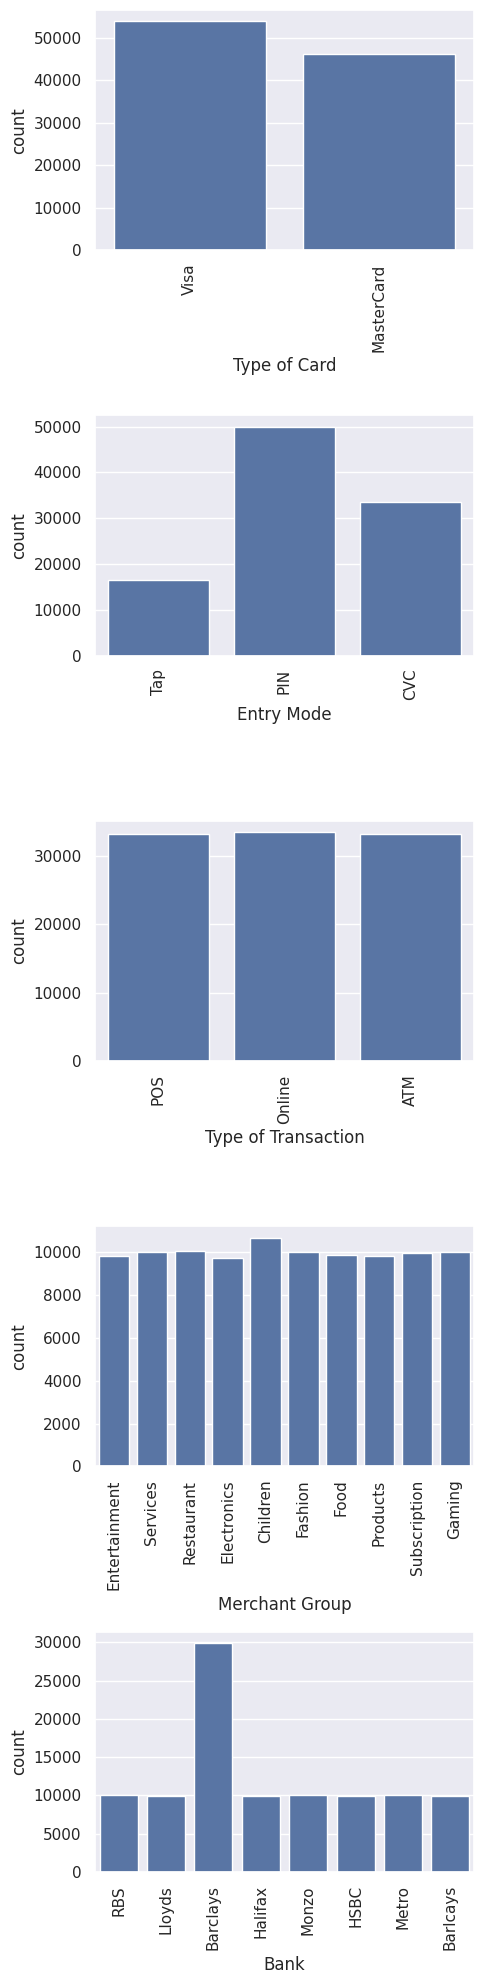

In [ ]:
datavisual = credit_data[['Type of Card', 'Entry Mode', 'Type of Transaction', 'Merchant Group', 'Bank']]
f, axes = plt.subplots(5, figsize = (5, 20))

for i, column in enumerate(datavisual.select_dtypes(include=['object', 'category']).columns):
    sb.countplot(data=datavisual, x=column, ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)  # rotate x-axis labels

plt.tight_layout()
plt.show()

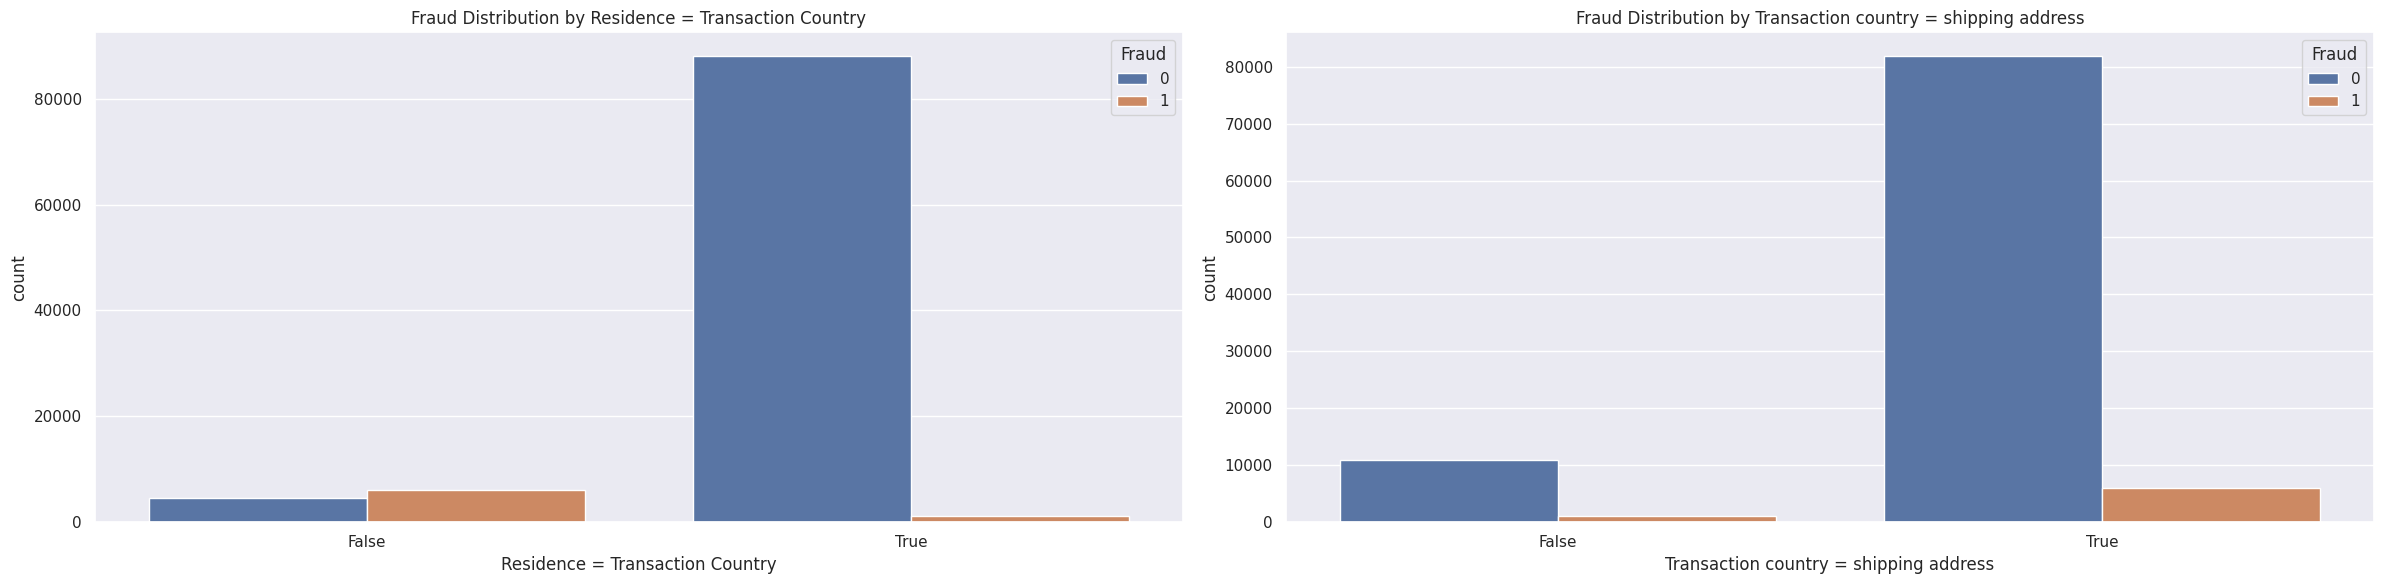

In [ ]:
datavisual = credit_data[['Residence = Transaction Country', 'Transaction country = shipping address', 'Fraud']]
f, axes = plt.subplots(1, 2, figsize=(24, 6))

for i, column in enumerate(datavisual.columns[:-1]):  # to exclude 'Fraud' from the loop
    sb.countplot(data=datavisual, x=column, hue='Fraud', ax=axes[i])
    axes[i].set_title(f'Fraud Distribution by {column}')

plt.tight_layout()
plt.show()

# Training the model

In this project, we have decided to use the **XGBoost model.** This is because XGBoost isn't usually linear and can learn complex patterns in user behavior, transaction location, frequency, time, amount, etc. Furthermore, it is able to handle both numerical and categorical data which is presented in our dataset.



In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# removing column "Fraud"
credit_variables = credit_data.drop(columns = ['Fraud'])
print(credit_variables.dtypes)

# converting objects to categorical variables
var = ['Type of Card', 'Entry Mode', 'Type of Transaction', 'Merchant Group', 'Country of Transaction', 'Shipping Address', 'Country of Residence', 'Bank']

for col in var:
  if col in credit_variables.columns:
    credit_variables[col] = credit_variables[col].astype('category')

print(credit_variables.dtypes)


# split dataset into training and testing (85-15)
X_train, X_test, y_train, y_test = train_test_split(credit_variables, credit_data['Fraud'], test_size=0.15, random_state=42)

# convert dataset into DMatrix (optimized format for XGBoost)
train_data = xgb.DMatrix(X_train, label=y_train, enable_categorical = True)
test_data = xgb.DMatrix(X_test, label=y_test, enable_categorical= True)


# define parameters
params = {
    'objective': 'binary:logistic',
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100
}



Time                                        int64
Type of Card                               object
Entry Mode                                 object
Amount                                      int64
Type of Transaction                        object
Merchant Group                             object
Country of Transaction                     object
Shipping Address                           object
Country of Residence                       object
Age                                       float64
Bank                                       object
Residence = Transaction Country              bool
Transaction country = shipping address       bool
dtype: object
Time                                         int64
Type of Card                              category
Entry Mode                                category
Amount                                       int64
Type of Transaction                       category
Merchant Group                            category
Country of Transaction        

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:20:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Training Accuracy: 0.9836079077429983


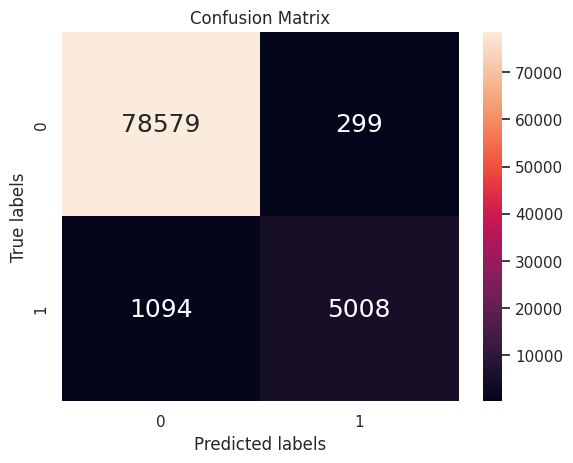

In [ ]:
# training the model based on train data
model = xgb.train(params, train_data, num_boost_round=100)

# print accuracy of model on train data
y_pred_train = model.predict(train_data)
y_pred_train_binary = [1 if pred > 0.5 else 0 for pred in y_pred_train]
accuracy_train = accuracy_score(y_train, y_pred_train_binary)
print("Training Accuracy:", accuracy_train)

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_train, y_pred_train_binary)

# plot the confusion matrix
sb.heatmap(conf_matrix, annot=True, fmt=".0f", annot_kws={"size": 18})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
tpTrain = conf_matrix[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = conf_matrix[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = conf_matrix[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = conf_matrix[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))


TPR Train :	 0.8207145198295641
TNR Train :	 0.9962093359365095

FPR Train :	 0.003790664063490454
FNR Train :	 0.1792854801704359


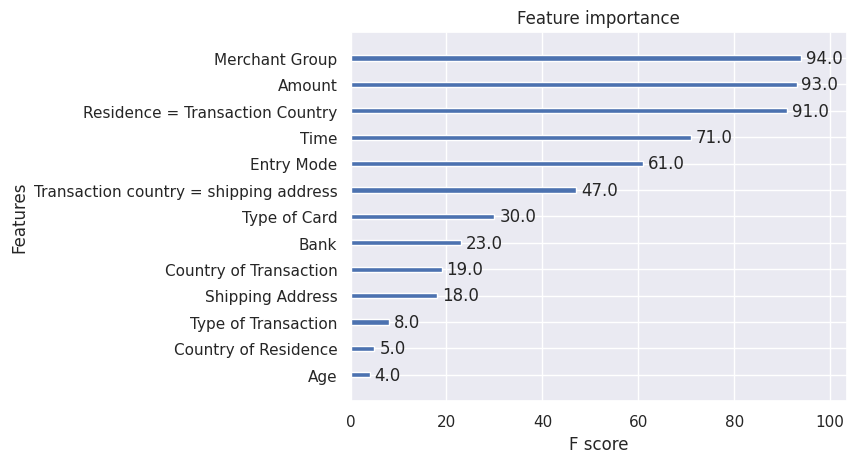

In [ ]:
xgb.plot_importance(model)
plt.show()

## Making predictions based on test data

In [ ]:
# make predictions based on test data
y_pred = model.predict(test_data)
y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]

# evaluating accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

Accuracy: 0.9817296792691872


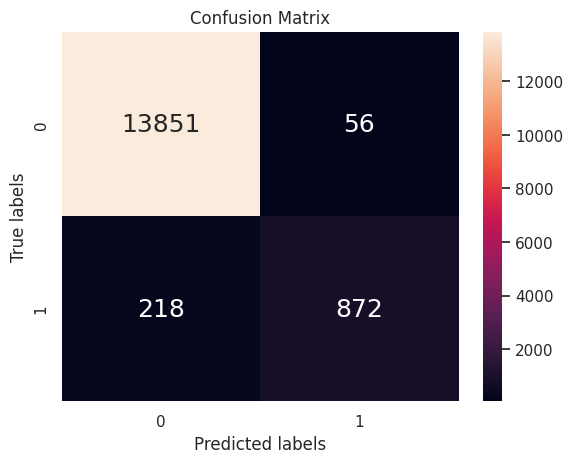

In [ ]:
#(POSSIBLE DELELTE???)
# Compute the confusion matrix
conf_matrix2 = confusion_matrix(y_test, y_pred_binary)

# Plot the confusion matrix using seaborn
sb.heatmap(conf_matrix2, annot=True, fmt=".0f", annot_kws={"size": 18})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
tpTest = conf_matrix2[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = conf_matrix2[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = conf_matrix2[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = conf_matrix2[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(tnTest + fpTest)))
print("FNR Test :\t", (fnTest/(tpTest + fnTest)))

TPR Test :	 0.8
TNR Test :	 0.9959732508808514

FPR Test :	 0.00402674911914863
FNR Test :	 0.2


### As we can see from the high false negative rates above, the model missed detecting many frauds. Hence, we decided to **balance our dataset** so that the model does not become biased to the non-fraud majority. It would help the model better recognise patterns in fraudulent transactions.

# Balancing our dataset

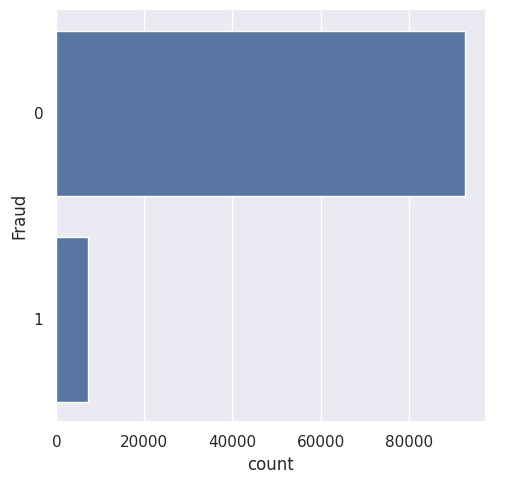

In [ ]:
sb.catplot(y = "Fraud", data = creditdata, kind = "count")

After exploration of our dataset, we realised a large imbalance between the number of fraud and non-fraud cases in the dataset.  Although the evaluated accuracy of the model after balancing the data set was 0.98 which is quite high, it might be due to there being a very disproportionate amount of non-fraud cases which led to the model being biased towards the non-fraud cases and predicting negatives more often in order to minimise error.
Thus we decided to balance the number of fraud and non-fraud cases using undersampling.

In [ ]:
num_trues = credit_data['Fraud'].sum()
print(num_trues)

7192


In [ ]:
from sklearn.utils import resample

# Separate fraud and non-fraud cases
credit_fraud = credit_data[credit_data['Fraud'] == 1]
credit_non_fraud = credit_data[credit_data['Fraud'] == 0]

# Count the number of fraud cases
fraud_count = len(credit_fraud)

# Undersample non-fraud cases to match the fraud count
non_fraud_sampled = resample(credit_non_fraud,
                                replace=False,  # No replacement
                                n_samples=fraud_count,  # Match fraud cases
                                random_state=42)  # For reproducibility

# Combine the undersampled non-fraud cases with fraud cases
credit_balanced = pd.concat([credit_fraud, non_fraud_sampled])

# Shuffle the dataset to mix fraud and non-fraud cases
credit_balanced = credit_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Verify new class distribution
print(credit_balanced['Fraud'].value_counts())

Fraud
0    7192
1    7192
Name: count, dtype: int64


### Further exploration of balanced dataset

Now that our dataset is balanced, we will carry out exploratory analysis once again.

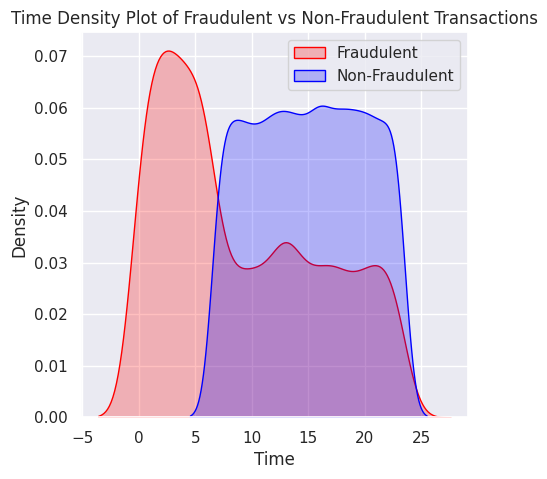

In [ ]:
plt.figure(figsize = (5, 5))
sb.kdeplot(credit_balanced[credit_balanced['Fraud'] == 1]['Time'], label='Fraudulent', color='red', fill=True)
sb.kdeplot(credit_balanced[credit_balanced['Fraud'] == 0]['Time'], label='Non-Fraudulent', color='blue', fill=True)

plt.xlabel("Time")
plt.ylabel("Density")
plt.title("Time Density Plot of Fraudulent vs Non-Fraudulent Transactions")
plt.legend()
plt.show()

The proportion of fraud cases from 0000 to 0700 is much higher than the number of fraud cases during the rest of the day. The number of non-fraud cases are extremely low from 0000 to 0700 and almost double of the number of the number of fraud cases during the rest of the day. This shows a possible relationship between the time of transaction and the possibility of the transaction being fraudulent.

<ipython-input-134-3d4ae5746ecc>:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sb.violinplot(x = 'Fraud', y = 'Amount', data = credit_balanced, scale = 'width')


<Axes: xlabel='Fraud', ylabel='Amount'>

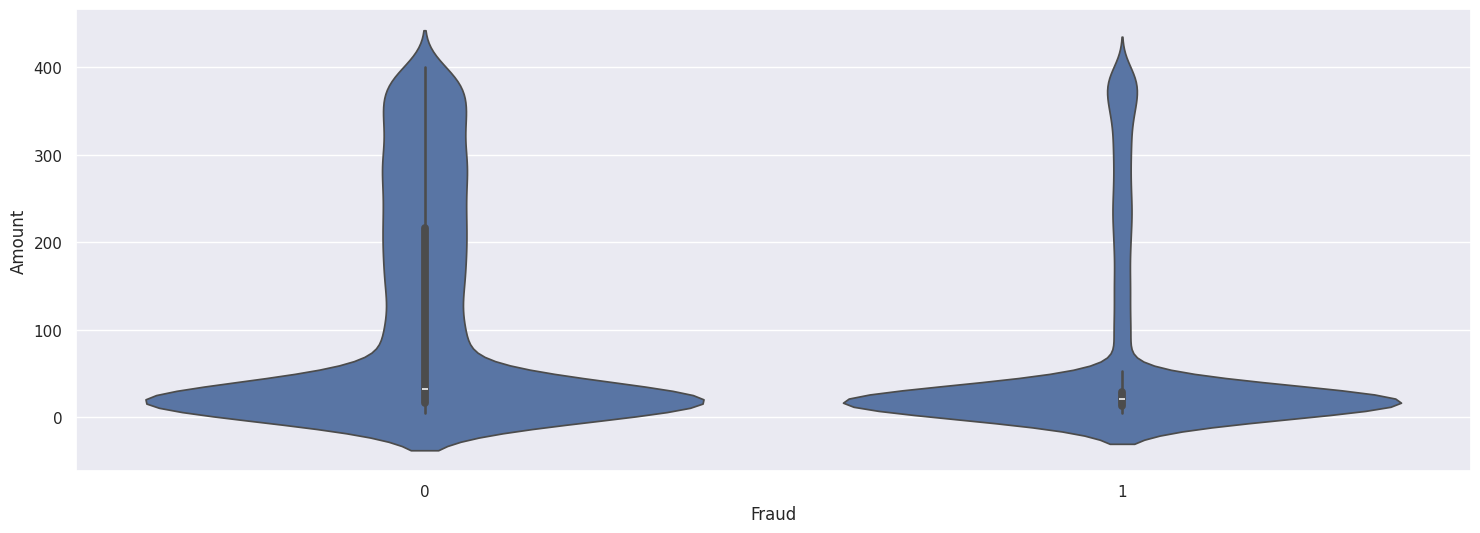

In [ ]:
f = plt.figure(figsize=(18, 6))
sb.violinplot(x = 'Fraud', y = 'Amount', data = credit_balanced, scale = 'width')

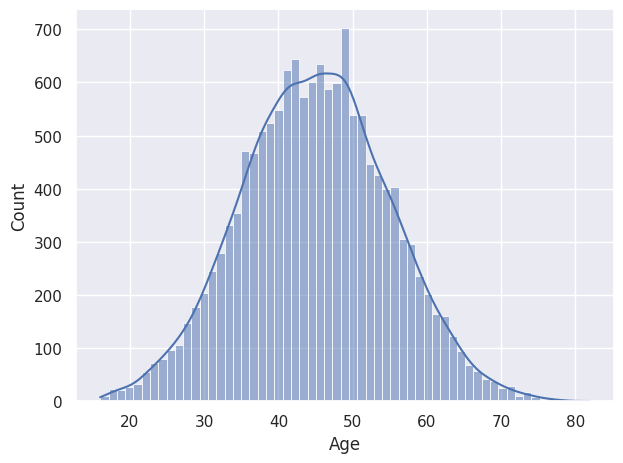

In [ ]:
sb.histplot(data = credit_balanced, x = 'Age', kde = True)

plt.tight_layout()
plt.show()

<ipython-input-136-41c73abee908>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)  # Apply rotation to each subplot
<ipython-input-136-41c73abee908>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)  # Apply rotation to each subplot
<ipython-input-136-41c73abee908>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)  # Apply rotation to each subplot
<ipython-input-136-41c73abee908>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xtickl

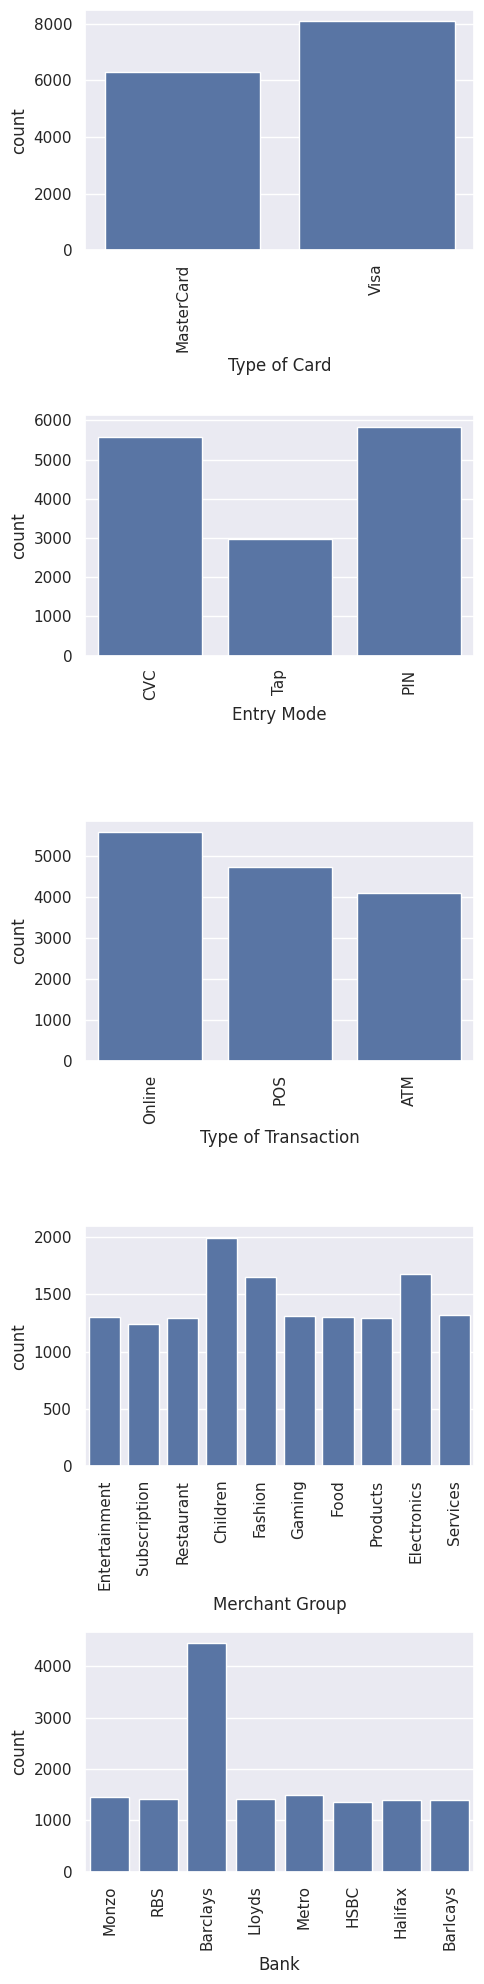

In [ ]:
datavisual2 = credit_balanced[['Type of Card', 'Entry Mode', 'Type of Transaction', 'Merchant Group', 'Bank']]
f, axes = plt.subplots(5, figsize = (5, 20))

for i, column in enumerate(datavisual2.select_dtypes(include=['object', 'category']).columns):
    sb.countplot(data=datavisual2, x=column, ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)  # Apply rotation to each subplot

plt.tight_layout()
plt.show()

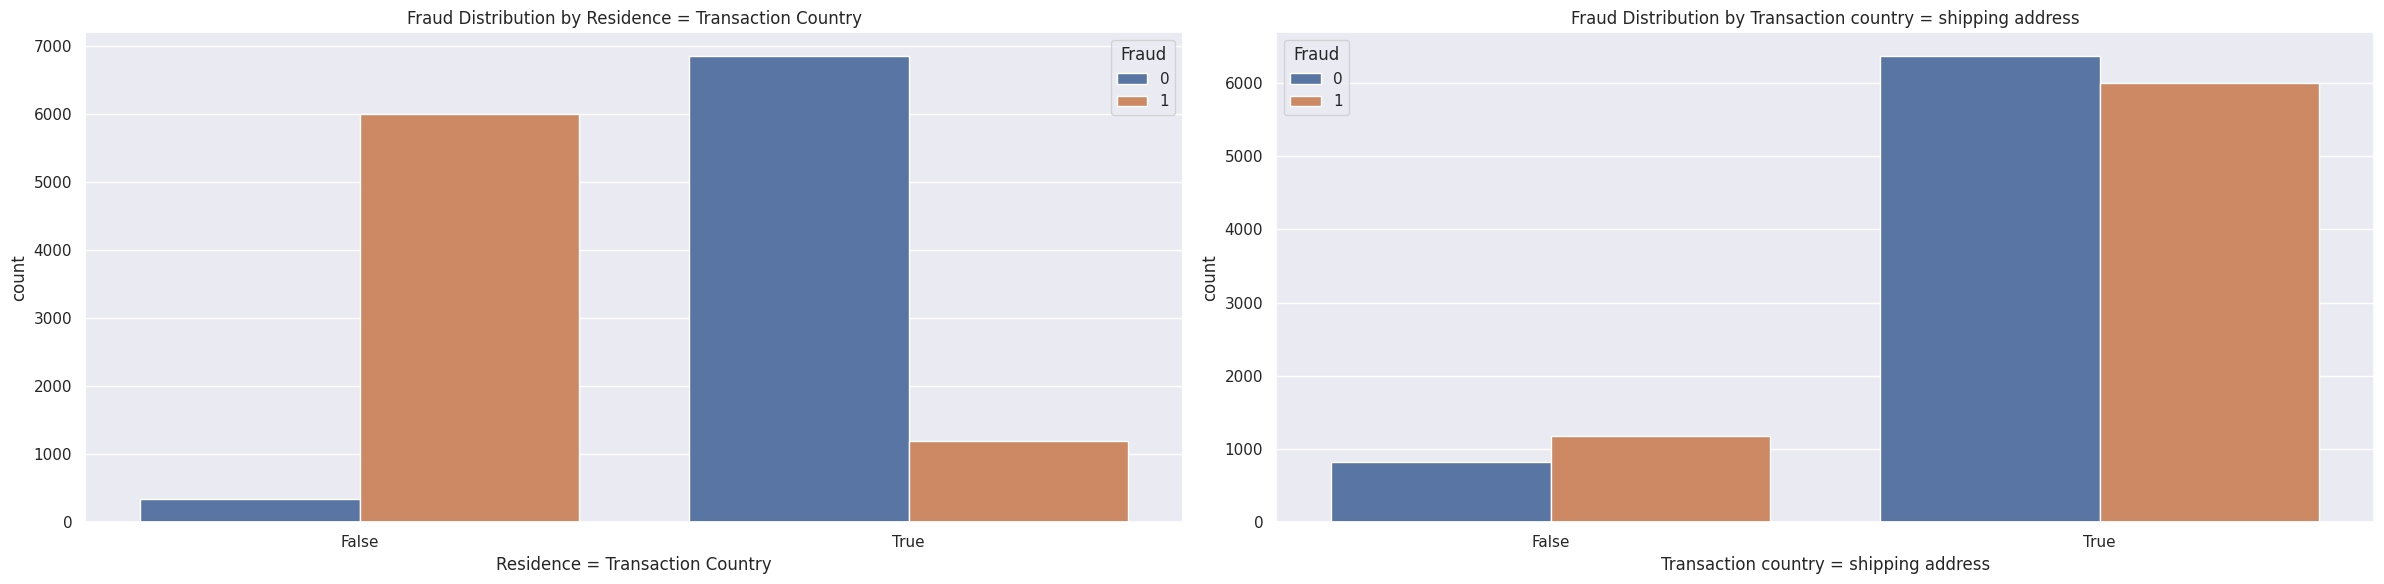

In [ ]:
datavisual3 = credit_balanced[['Residence = Transaction Country', 'Transaction country = shipping address', 'Fraud']]
f, axes = plt.subplots(1, 2, figsize=(24, 6))

for i, column in enumerate(datavisual3.columns[:-1]):  # Exclude 'Fraud' from the loop
    sb.countplot(data=datavisual3, x=column, hue='Fraud', ax=axes[i])
    axes[i].set_title(f'Fraud Distribution by {column}')

plt.tight_layout()
plt.show()

# Determining which numeric variables are important

After cleaning, we are still unsure of which of the 2 numeric variables: Time and Amount are important. Hence we decided to use Lasso regression to determine if we should be including these two variables in our final model. The lasso regression shrinks unimportant features, helping the model focus on variables that truly matter. It can also shrink the coefficients of less important variables to zero, completely removing them from the model.

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Create a sample dataset
np.random.seed(42)
X = pd.DataFrame({
    'time': credit_balanced['Time'],
    'amount': credit_balanced['Amount']
})
y = credit_balanced['Fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Lasso regression
lasso = Lasso(alpha=1)  # Regularization strength
lasso.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Output the results
print("Coefficients:", lasso.coef_)
print("Intercept:", lasso.intercept_)
print("Mean Squared Error:", mse)

# Identify important features
important_features = X_train.columns[lasso.coef_ != 0]
print("Selected Features:", important_features.tolist())


Coefficients: [-0.00887115 -0.00084529]
Intercept: 0.684921983380109
Mean Squared Error: 0.21598898111437775
Selected Features: ['time', 'amount']


After adjusting the penalty strength and trying out different values from 1-5, we realised that after the penalty strength of 1.4, the selected variable only included 'amount'. This may indicate that 'amount' is a more important variable. Nonetheless, we still feel that 'time' is an important feature since it is still selected with a penalty strength of 1.4. Hence we will include both in our final model.

Since we were still left with a large number of variables in our dataset, we chose to use XGBoost to help determine the importance of each variable in determining whether the transaction was fraudulent.
As XGBoost works with categorical and numeric data, we converted the data classified as objects to categorical data.

We then split the data set into 85% training data and 15% test data.

The parameters we chose were:
1. Type of classification tree was binary
2. Max depth of tree was 3
3. Learning rate of 0.1
4. 100 boosting rounds

In [ ]:

#removing column "Fraud"
credit_variables = credit_balanced.drop(columns = ['Fraud'])
print(credit_variables.dtypes)

#converting objects to categorical variables
var = ['Type of Card', 'Entry Mode', 'Type of Transaction', 'Merchant Group', 'Country of Transaction', 'Shipping Address', 'Country of Residence', 'Bank']

for col in var:
  if col in credit_variables.columns:
    credit_variables[col] = credit_variables[col].astype('category')

print(credit_variables.dtypes)


# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(credit_variables, credit_balanced['Fraud'], test_size=0.15, random_state=42)

# Convert dataset into DMatrix (optimized format for XGBoost)
train_data = xgb.DMatrix(X_train, label=y_train, enable_categorical = True)
test_data = xgb.DMatrix(X_test, label=y_test, enable_categorical= True)


# Define parameters
params = {
    'objective': 'binary:logistic',  # For binary classification
    'max_depth': 3,                  # Maximum depth of trees
    'learning_rate': 0.1,            # Step size shrinkage
    'n_estimators': 100              # Number of boosting rounds
}



Time                                        int64
Type of Card                               object
Entry Mode                                 object
Amount                                      int64
Type of Transaction                        object
Merchant Group                             object
Country of Transaction                     object
Shipping Address                           object
Country of Residence                       object
Age                                       float64
Bank                                       object
Residence = Transaction Country              bool
Transaction country = shipping address       bool
dtype: object
Time                                         int64
Type of Card                              category
Entry Mode                                category
Amount                                       int64
Type of Transaction                       category
Merchant Group                            category
Country of Transaction        

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:20:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Training Accuracy: 0.9584492066088663


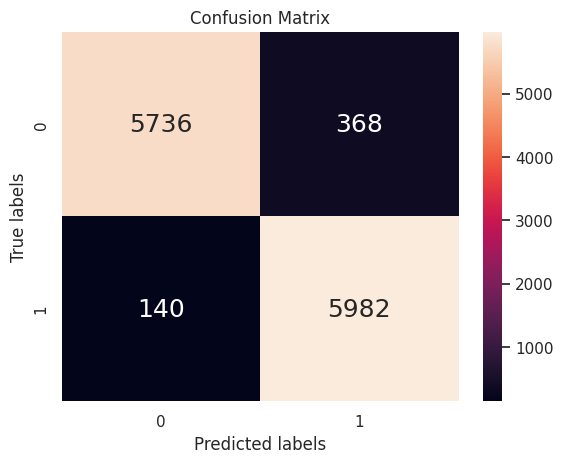

In [ ]:
# Train the model
model = xgb.train(params, train_data, num_boost_round=100)

# print accuracy of model on train data
y_pred_train = model.predict(train_data)
y_pred_train_binary = [1 if pred > 0.5 else 0 for pred in y_pred_train]
accuracy_train = accuracy_score(y_train, y_pred_train_binary)
print("Training Accuracy:", accuracy_train)

conf_matrix3 = confusion_matrix(y_train, y_pred_train_binary)

# plot the confusion matrix
sb.heatmap(conf_matrix3, annot=True, fmt=".0f", annot_kws={"size": 18})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()



In [ ]:
tpTrain = conf_matrix3[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = conf_matrix3[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = conf_matrix3[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = conf_matrix3[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))


TPR Train :	 0.9771316563214636
TNR Train :	 0.9397116644823067

FPR Train :	 0.06028833551769332
FNR Train :	 0.022868343678536424


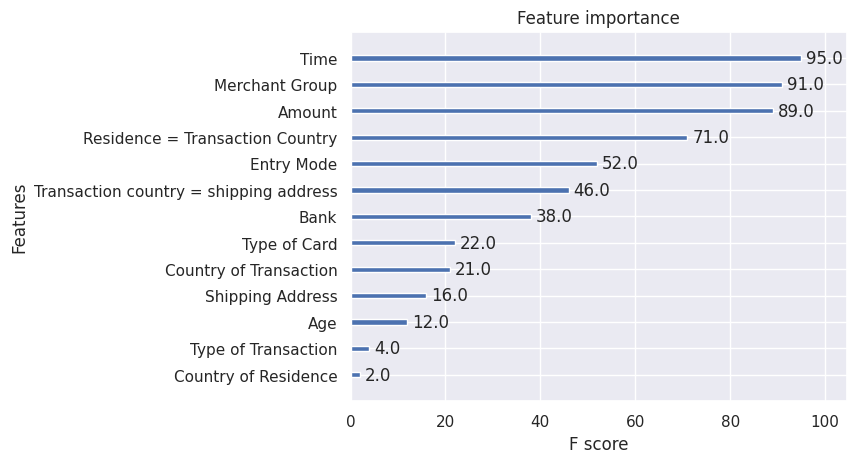

In [ ]:
xgb.plot_importance(model)
plt.show()


This model shows the importance of each variable in predicting whether a transaction was fraudulent. The higher the F score, the more frequently the variable was used to split data points across all trees in the model, hence the more important it is.

In [ ]:
# Make predictions
y_pred = model.predict(test_data)
y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

Accuracy: 0.953660797034291


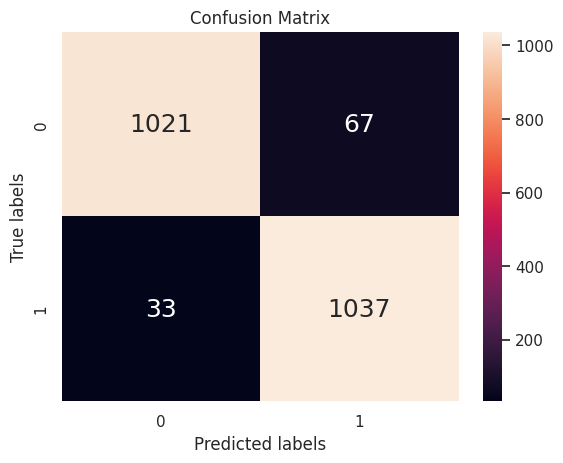

In [ ]:
# Compute the confusion matrix
conf_matrix4 = confusion_matrix(y_test, y_pred_binary)

# plot confusion matrix
sb.heatmap(conf_matrix4, annot=True, fmt=".0f", annot_kws={"size": 18})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
tpTest = conf_matrix[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = conf_matrix[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = conf_matrix[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = conf_matrix[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(tnTest + fpTest)))
print("FNR Test :\t", (fnTest/(tpTest + fnTest)))


TPR Test :	 0.8207145198295641
TNR Test :	 0.9962093359365095

FPR Test :	 0.003790664063490454
FNR Test :	 0.1792854801704359


The FNR decreased significantly and the TPR increased. Hence, balancing the dataset allowed our model to classify the fraud and non-fraud cases more accurately and with less bias.

# Analysing the top 5 variables used to predict whether a transaction was fraudulent.

In [ ]:
top5_fraud_variables = credit_balanced[credit_balanced['Fraud'] == 1]
top5_fraud_variables.head()

,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Age,Bank,Fraud,Residence = Transaction Country,Transaction country = shipping address
1,15,MasterCard,CVC,27,Online,Subscription,India,India,United Kingdom,45.1,RBS,1,False,True
3,5,Visa,Tap,13,POS,Restaurant,China,China,United Kingdom,47.3,Barclays,1,False,True
4,6,MasterCard,CVC,19,Online,Children,India,India,United Kingdom,57.5,Monzo,1,False,True
7,6,Visa,CVC,11,Online,Children,United Kingdom,India,United Kingdom,47.0,Metro,1,True,False
8,14,Visa,Tap,28,POS,Food,USA,USA,United Kingdom,46.5,Barclays,1,False,True


The top 5 variables from the importance graph was Time, Merchant Group, Amount, Rsidence- Transaction Country and Entry Mode. Hence we decided ot analyse each of these variables to see if there were any patterns to be identified.

<Axes: xlabel='Amount', ylabel='Count'>

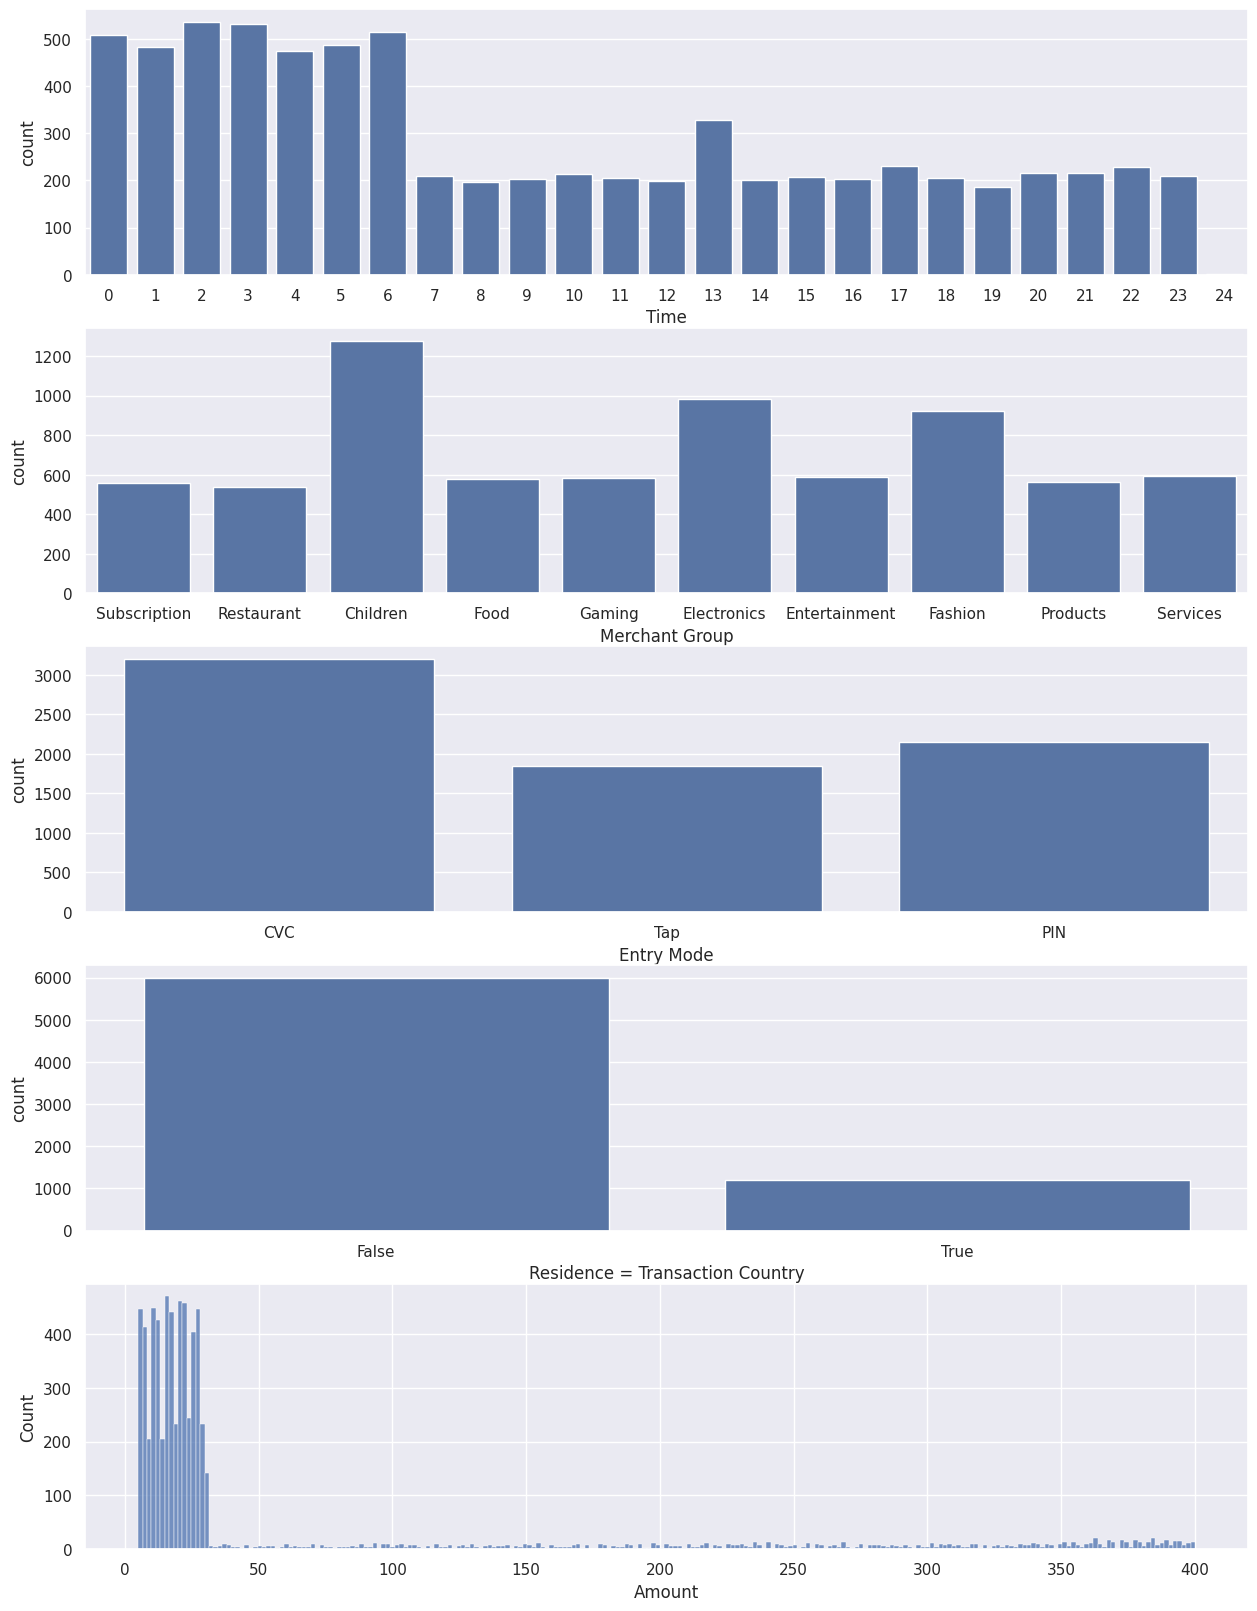

In [ ]:
top5 = top5_fraud_variables[['Time', 'Merchant Group', 'Entry Mode', 'Residence = Transaction Country', 'Amount']]
f, axes = plt.subplots(5, figsize = (15, 20))

sb.countplot(data=top5, x= top5['Time'], ax=axes[0])
sb.countplot(data=top5, x= top5['Merchant Group'], ax=axes[1])
sb.countplot(data=top5, x= top5['Entry Mode'], ax=axes[2])
sb.countplot(data=top5, x= top5['Residence = Transaction Country'], ax=axes[3])
sb.histplot(data=top5, x= top5['Amount'], ax=axes[4])

Based on the graphs above, it can be seen that:

- Fraudulent transactions were more likely to happen from 12am to 6am

- Merchant groups: Children, Electronics and Fashion were more susceptible to frauds.

- Credit Verification Code entry mode was the most common entry mode for frauds

- There is a higher probability of the transaction being fraudulent if the country of residence of the transactor was different from the country of transaction

- A significant proportion of fraudulent transactions involved only small amounts of money from about 5 to 30 pounds.